## Factors Affecting Life Expectancy
By Mahfuz Miah, September 24th, 2019

## 1. Synopsis
#### The goal in this challenge is to find the factors that affect the life expectancy. Specifically, we need to find out which factors increase the expected life in the countries and which factors decrease it.

## 2. Background
Below is an explanation of column headings from the document hosted by Kaggle named: Life Expectancy [https://www.kaggle.com/kumarajarshi/life-expectancy-who/home]

Column Definitions:

- Country - Country
- Year - Year
- Status - Developed or Developing status
- Life expectancy - Life Expectancy in age
- Adult Mortality - Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- infant deaths - Number of Infant Deaths per 1000 population
- Alcohol - Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
- percentage expenditure - Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- Hepatitis B - Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
- Measles - Measles - number of reported cases per 1000 population
- BMI Average - Body Mass Index of entire population
- under-five deaths - Number of under-five deaths per 1000 population
- Polio - Polio (Pol3) immunization coverage among 1-year-olds (%)
- Total expenditure - General government expenditure on health as a percentage of total government expenditure (%)
- Diphtheria - Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- HIV/AIDS - Deaths per 1 000 live births HIV/AIDS (0-4 years)
- GDP - Gross Domestic Product per capita (in USD)
- Population - Population of the country
- thinness 10-19 years - Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
- thinness 5-9 years - Prevalence of thinness among children for Age 5 to 9(%)
- Income composition of resources - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- Schooling - Number of years of Schooling(years)

## 3. Understanding and Preparing the Data Set

In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
from fractions import Fraction
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import ttest_ind
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import scipy.stats as stats

warnings.filterwarnings('ignore')

In [2]:
## load data
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from lifeexpectancy',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [5]:
# Let's see what the names of each column actually look like
column_names = list(df.columns.values) 
print(column_names)

['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [6]:
# there is a type-o in the name of one of the columns
df.columns = ['thinness 10-19 yrs' if x==' thinness  1-19 years' else x for x in df.columns]

In [7]:
column_names = list(df.columns.values) 
print(column_names)

['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', 'thinness 10-19 yrs', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [8]:
#standardize names of columns

# Strip and make column names lowercase so that they are easy to manage. 
df.columns = df.columns.str.strip().str.lower()
# Replace characters or remove spaces and make all words lowercase.
df.columns = df.columns.str.replace('  ', '_').str.replace(' ', '_').str.replace('/', '_').str.replace('-', '_').str.replace('(', '').str.replace(')', '')

In [9]:
# What's inside the file? Let's take a preview.
column_names = list(df.columns.values) 
print(column_names)

['country', 'year', 'status', 'life_expectancy', 'adult_mortality', 'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure', 'diphtheria', 'hiv_aids', 'gdp', 'population', 'thinness_10_19_yrs', 'thinness_5_9_years', 'income_composition_of_resources', 'schooling']


Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

## 4. Data preparation

### I. Handling missing data:
Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

In [10]:
life_df = df.copy() #rename df with new 

In [11]:
## Let's find the percent of empty entries in each column


def percentmissing (df):
    numer = df.isnull().sum() 
    denom = df.isnull().count()

    data= []
    #Below is code I used to check what the fractions were prior to trying to view with the dataframe version 
    #i = 0 
    #for x,y in zip(numer,denom):
    #    print (numer.index[i], ":", (Fraction(x,y)))
    #    i+=1

    #View results in dataframe
    i = 0
    for x,y in zip(numer,denom):
        data.append([numer.index[i],x,(Fraction(x,y)), x*100/y])
        i+=1
    
    df1 = pd.DataFrame(data,columns = ['Column_Name','# Missing', 'Fraction Missing','Percent Missing'])
    return df1

percentmissing(life_df)

,Column_Name,# Missing,Fraction Missing,Percent Missing
0,country,0,0,0.000000
1,year,0,0,0.000000
2,status,0,0,0.000000
3,life_expectancy,10,5/1469,0.340368
4,adult_mortality,10,5/1469,0.340368
5,infant_deaths,0,0,0.000000
6,alcohol,194,97/1469,6.603131
7,percentage_expenditure,0,0,0.000000
8,hepatitis_b,553,553/2938,18.822328
9,measles,0,0,0.000000


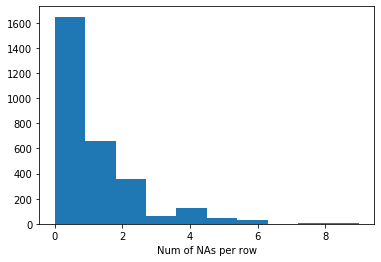

In [12]:
## Are there rows with multiple missing entries?
na_count = life_df.isnull().sum(axis=1) # sum up all the NAs by each row of the df
plt.hist(na_count) # make a histogram of the counts by row
plt.xlabel("Num of NAs per row") # x-axis label
plt.show()

Before we do any filling in of data, lets get rid of nonsensical data.

#### Get rid of nonsensical data:

Look at descriptions to see where nonsensical data may exist:

Adult Mortality - Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
infant deaths - Number of Infant Deaths per 1000 population
Alcohol - Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
percentage expenditure - Expenditure on health as a percentage of Gross Domestic Product per capita(%)
Hepatitis B - Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
Measles - Measles - number of reported cases per 1000 population
BMI Average - Body Mass Index of entire population
under-five deaths - Number of under-five deaths per 1000 population
Polio - Polio (Pol3) immunization coverage among 1-year-olds (%)
Total expenditure - General government expenditure on health as a percentage of total government expenditure (%)
Diphtheria - Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
HIV/AIDS - Deaths per 1 000 live births HIV/AIDS (0-4 years)
GDP - Gross Domestic Product per capita (in USD)
Population - Population of the country
thinness 10-19 years - Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
thinness 5-9 years - Prevalence of thinness among children for Age 5 to 9(%)
Income composition of resources - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
Schooling - Number of years of Schooling(years)

In [13]:
column_names #list of all column names for me to quickly copy and paste as needed

['country',
 'year',
 'status',
 'life_expectancy',
 'adult_mortality',
 'infant_deaths',
 'alcohol',
 'percentage_expenditure',
 'hepatitis_b',
 'measles',
 'bmi',
 'under_five_deaths',
 'polio',
 'total_expenditure',
 'diphtheria',
 'hiv_aids',
 'gdp',
 'population',
 'thinness_10_19_yrs',
 'thinness_5_9_years',
 'income_composition_of_resources',
 'schooling']

In [14]:
life_df1 = life_df.copy()

In [15]:
#Remove > 1000 for following columns
colnames1 = ['adult_mortality','infant_deaths','measles','under_five_deaths','hiv_aids']
for col in colnames1:
    life_df1[col] = life_df1[col].replace(life_df1[col]>1000, np.NaN)
    

In [16]:
#Remove > 100 for following columns
colnames2 = ['percentage_expenditure',
             'hepatitis_b',
             'polio',
             'total_expenditure',
             'diphtheria',
             'thinness_10_19_yrs',
             'thinness_5_9_years']
for col in colnames2:
    life_df1[col] = life_df1[col].replace(life_df1[col]>100, np.NaN)

In [17]:
#Remove  < 0 for all columns
colnames3 = column_names[3:]
for col in colnames3:
    life_df1[col] = life_df1[col].replace(life_df1[col]<0, np.NaN)

In [18]:
#Remove  > 1 for Income composition of resources
colnames4 = ['income_composition_of_resources']
for col in colnames4:
    life_df1[col] = life_df1[col].replace(life_df1[col]>1, np.NaN)

In [19]:
# Let's see how much data we have added in by this method.

filleddf2 = percentmissing(life_df).join(percentmissing(life_df1), lsuffix='_before', rsuffix='_after')
filleddf2['# Filled'] = filleddf2['# Missing_before'] - filleddf2['# Missing_after']
filleddf2

,Column_Name_before,# Missing_before,Fraction Missing_before,Percent Missing_before,Column_Name_after,# Missing_after,Fraction Missing_after,Percent Missing_after,# Filled
0,country,0,0,0.000000,country,0,0,0.000000,0
1,year,0,0,0.000000,year,0,0,0.000000,0
2,status,0,0,0.000000,status,0,0,0.000000,0
3,life_expectancy,10,5/1469,0.340368,life_expectancy,10,5/1469,0.340368,0
4,adult_mortality,10,5/1469,0.340368,adult_mortality,10,5/1469,0.340368,0
5,infant_deaths,0,0,0.000000,infant_deaths,848,424/1469,28.863172,-848
6,alcohol,194,97/1469,6.603131,alcohol,194,97/1469,6.603131,0
7,percentage_expenditure,0,0,0.000000,percentage_expenditure,611,47/226,20.796460,-611
8,hepatitis_b,553,553/2938,18.822328,hepatitis_b,553,553/2938,18.822328,0
9,measles,0,0,0.000000,measles,983,983/2938,33.458135,-983


#### Interpolate Data In a Country Specific Way Now That Nonsensical Data is Removed 

In [20]:
# Use pandas interpolation function to fill missing values since all categories 
# are floats or ints and because some linearity is noticed for each of the categories.
# We do notice that there tend to be values that may be type-os. These will be addressed 
# with outlier clean-up.

life_df2 = life_df1.copy()

fill_cols = life_df2.columns[life_df2.isnull().sum() > 0] # get a list of the columns that still have missing data
countries = life_df2['country'].unique() # get a list of the unique countries listed in the Country column

# data is already arranged alphabetically by country name and then by year in descending order
# interpolate values by country in both directions
for country in countries:
    life_df2.loc[life_df2['country'] == country, fill_cols] = life_df2.loc[life_df2['country'] == country, fill_cols].interpolate(method='linear', limit_direction='both')

In [21]:
life_df2.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_10_19_yrs,thinness_5_9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [22]:
# Let's see how much data we have filled in by this method.

filleddf = percentmissing(life_df1).join(percentmissing(life_df2), lsuffix='_before', rsuffix='_after')
filleddf['# Filled'] = filleddf['# Missing_before'] - filleddf['# Missing_after']
filleddf

,Column_Name_before,# Missing_before,Fraction Missing_before,Percent Missing_before,Column_Name_after,# Missing_after,Fraction Missing_after,Percent Missing_after,# Filled
0,country,0,0,0.000000,country,0,0,0.000000,0
1,year,0,0,0.000000,year,0,0,0.000000,0
2,status,0,0,0.000000,status,0,0,0.000000,0
3,life_expectancy,10,5/1469,0.340368,life_expectancy,10,5/1469,0.340368,0
4,adult_mortality,10,5/1469,0.340368,adult_mortality,10,5/1469,0.340368,0
5,infant_deaths,848,424/1469,28.863172,infant_deaths,762,381/1469,25.936011,86
6,alcohol,194,97/1469,6.603131,alcohol,17,17/2938,0.578625,177
7,percentage_expenditure,611,47/226,20.796460,percentage_expenditure,421,421/2938,14.329476,190
8,hepatitis_b,553,553/2938,18.822328,hepatitis_b,144,72/1469,4.901293,409
9,measles,983,983/2938,33.458135,measles,330,165/1469,11.232131,653


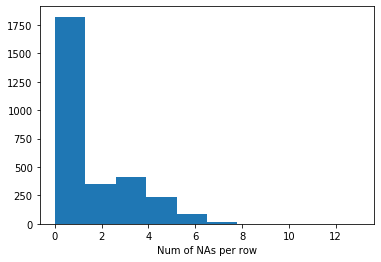

In [23]:
## Are there still rows with multiple missing entries?
na_count = life_df2.isnull().sum(axis=1) # sum up all the NAs by each row of the df
plt.hist(na_count) # make a histogram of the counts by row
plt.xlabel("Num of NAs per row") # x-axis label
plt.show()

We filled some of the data but 700+ entries are still not filled. Seems as if some countries are missing whole columns of data so interpolation does not work on those missing values.

In [24]:
# Fill the rest of the missing NA with mean values of the columns, with respect to status.
life_df3 = life_df2.copy()

statuses = ['Developing','Developed']
for col in fill_cols: 
    for status in statuses: 
        # fill_cols was previously defined as the list of columns that has NA values
        meanvalue = life_df3.loc[(life_df3['status'] == status), col].mean()
        life_df3.loc[(life_df3['status'] == status), col] = life_df3.loc[(life_df3['status'] == status), col].fillna(meanvalue)
        print(f'{status},{col} = ', life_df3.loc[(life_df3['status'] == status), col].mean())
        # replace all NaN with the mean for the column by status. This prevents the mean of the column (by status)
        # being changed but gives a value to each NaN

life_df3.head()

Developing,life_expectancy =  67.11146523178817
Developed,life_expectancy =  79.19785156249996
Developing,adult_mortality =  182.83319536423838
Developed,adult_mortality =  79.685546875
Developing,infant_deaths =  45.24641393442583
Developed,infant_deaths =  3.5625
Developing,alcohol =  3.412928601079309
Developed,alcohol =  9.71933593749999
Developing,percentage_expenditure =  416.7761062096746
Developed,percentage_expenditure =  3327.17961823736
Developing,hepatitis_b =  74.64315352697096
Developed,hepatitis_b =  83.30208333333354
Developing,measles =  3371.0506628787994
Developed,measles =  569.4274193548387
Developing,bmi =  35.43532608695645
Developed,bmi =  51.80390625
Developing,under_five_deaths =  62.29827235772421
Developed,under_five_deaths =  3.970833333333325
Developing,polio =  79.8957131079967
Developed,polio =  93.736328125
Developing,total_expenditure =  5.587516708437755
Developed,total_expenditure =  7.582148437499993
Developing,diphtheria =  79.66900247320693
Develo

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_10_19_yrs,thinness_5_9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [224]:
# # Fill the rest of the missing NA with mean values for each column without respect to status.
# life_df3 = life_df2.copy()

# for col in fill_cols: 
#     # fill_cols was previously defined as the list of columns that has NA values
#     life_df3[col].fillna(life_df3[col].mean(),inplace=True)
#     # replace all NaN with the mean for the column. This prevents the mean of the column 
#     # being changed but gives a value to each NaN

# life_df3.head()

# Unblock above to try this different version of filling in NaN values.

In [25]:
# Let's see how much data we have filled in by this method.

filleddf2 = percentmissing(life_df2).join(percentmissing(life_df3), lsuffix='_before', rsuffix='_after')
filleddf2['# Filled'] = filleddf2['# Missing_before'] - filleddf2['# Missing_after']
filleddf2

,Column_Name_before,# Missing_before,Fraction Missing_before,Percent Missing_before,Column_Name_after,# Missing_after,Fraction Missing_after,Percent Missing_after,# Filled
0,country,0,0,0.000000,country,0,0,0.0,0
1,year,0,0,0.000000,year,0,0,0.0,0
2,status,0,0,0.000000,status,0,0,0.0,0
3,life_expectancy,10,5/1469,0.340368,life_expectancy,0,0,0.0,10
4,adult_mortality,10,5/1469,0.340368,adult_mortality,0,0,0.0,10
5,infant_deaths,762,381/1469,25.936011,infant_deaths,0,0,0.0,762
6,alcohol,17,17/2938,0.578625,alcohol,0,0,0.0,17
7,percentage_expenditure,421,421/2938,14.329476,percentage_expenditure,0,0,0.0,421
8,hepatitis_b,144,72/1469,4.901293,hepatitis_b,0,0,0.0,144
9,measles,330,165/1469,11.232131,measles,0,0,0.0,330


Our data set is ready to analyzed now.

### II. Handling outliers and transforming data

In [26]:
column_names1 = column_names[3:] # list of columns of interest for analysis
column_names1

['life_expectancy',
 'adult_mortality',
 'infant_deaths',
 'alcohol',
 'percentage_expenditure',
 'hepatitis_b',
 'measles',
 'bmi',
 'under_five_deaths',
 'polio',
 'total_expenditure',
 'diphtheria',
 'hiv_aids',
 'gdp',
 'population',
 'thinness_10_19_yrs',
 'thinness_5_9_years',
 'income_composition_of_resources',
 'schooling']

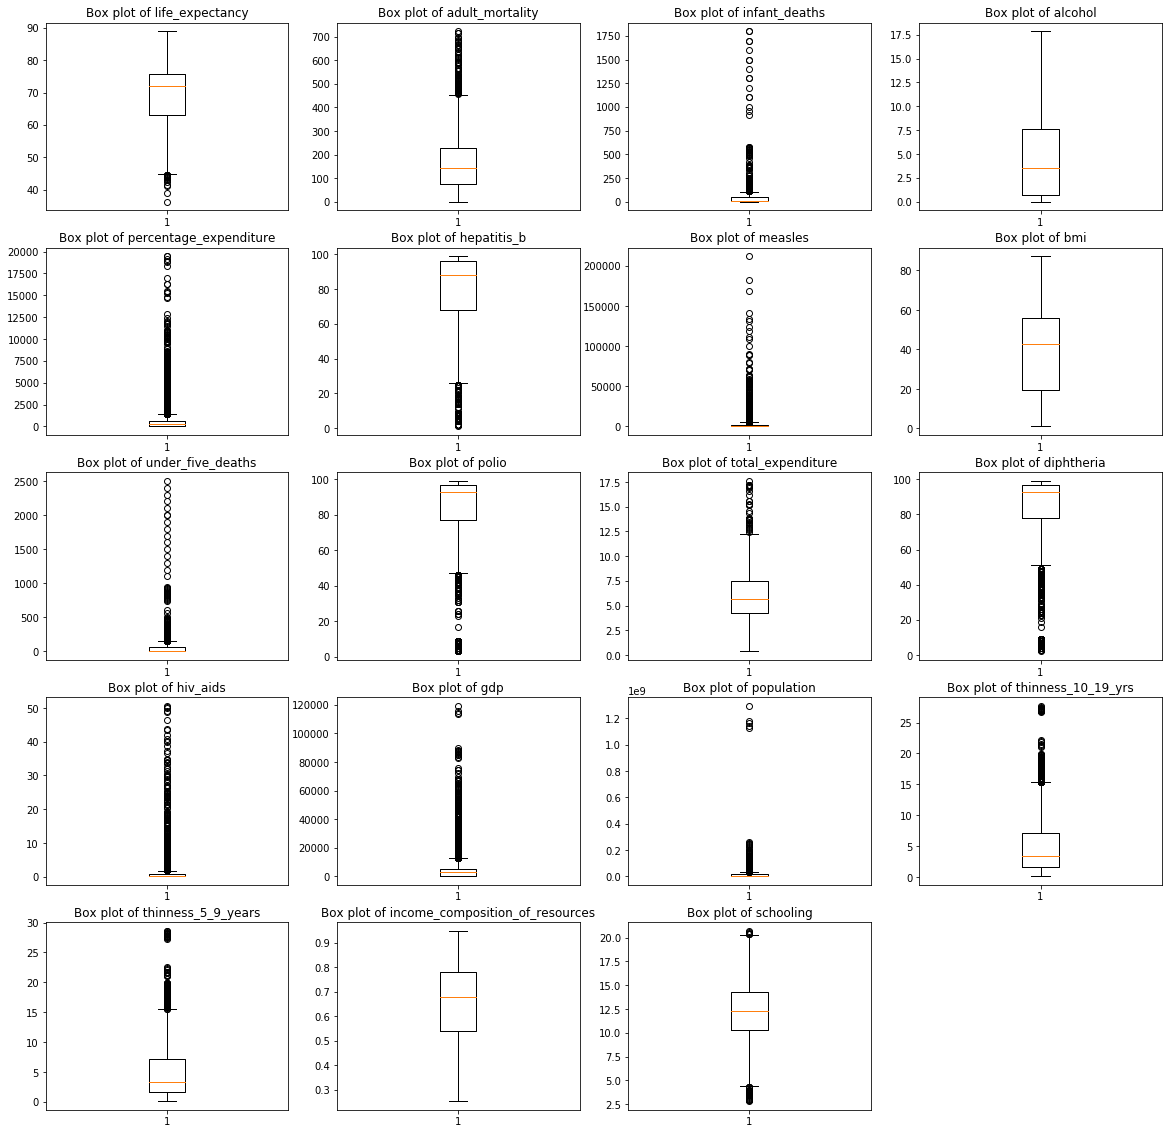

In [27]:
# Let's visualize the outliers

plt.figure(figsize=(20, 20))
i = 1
for col in column_names1:
    plt.subplot(5, 4, i)
    plt.boxplot(life_df3[col])
    plt.title(F"Box plot of {col}")
    i+=1
plt.show()


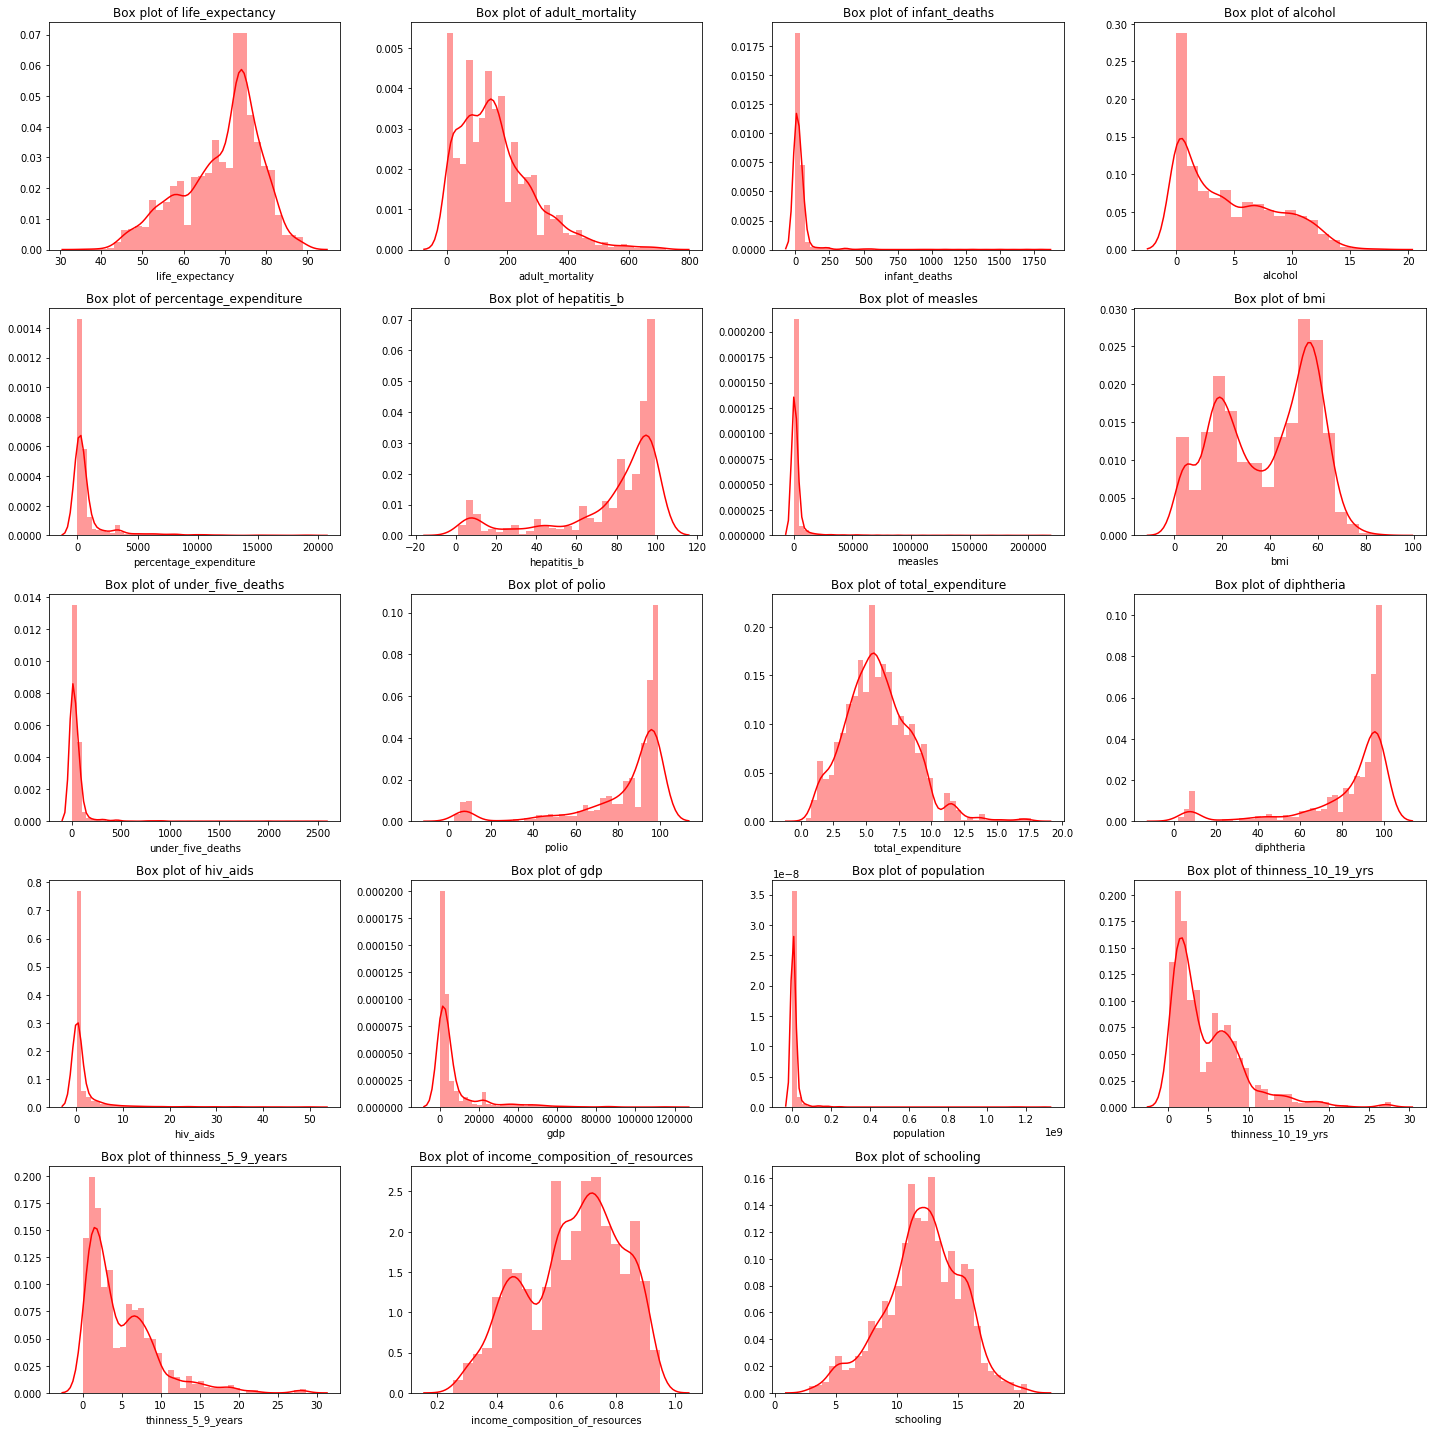

In [28]:
# Here, we will visualize the distribute of the data as it currently is.

plt.figure(figsize=(20, 20))
i = 1
for col in column_names1:
    plt.subplot(5, 4, i)
    sns.distplot(life_df3[col], color='r')
    plt.title(F"Box plot of {col}")
    i+=1

plt.tight_layout()
plt.show()

### III. Univariate analyis and dealing with non-normality

#### Do Log Transform on the Cleaned Data Set

In [29]:
life_df4 = life_df3.copy()
fortransform = [1,2,3,4,6,8,12,13,14,15,16]
for col in fortransform:
    life_df4.iloc[:, col+3] = life_df4.iloc[:, col+3].apply(np.log)

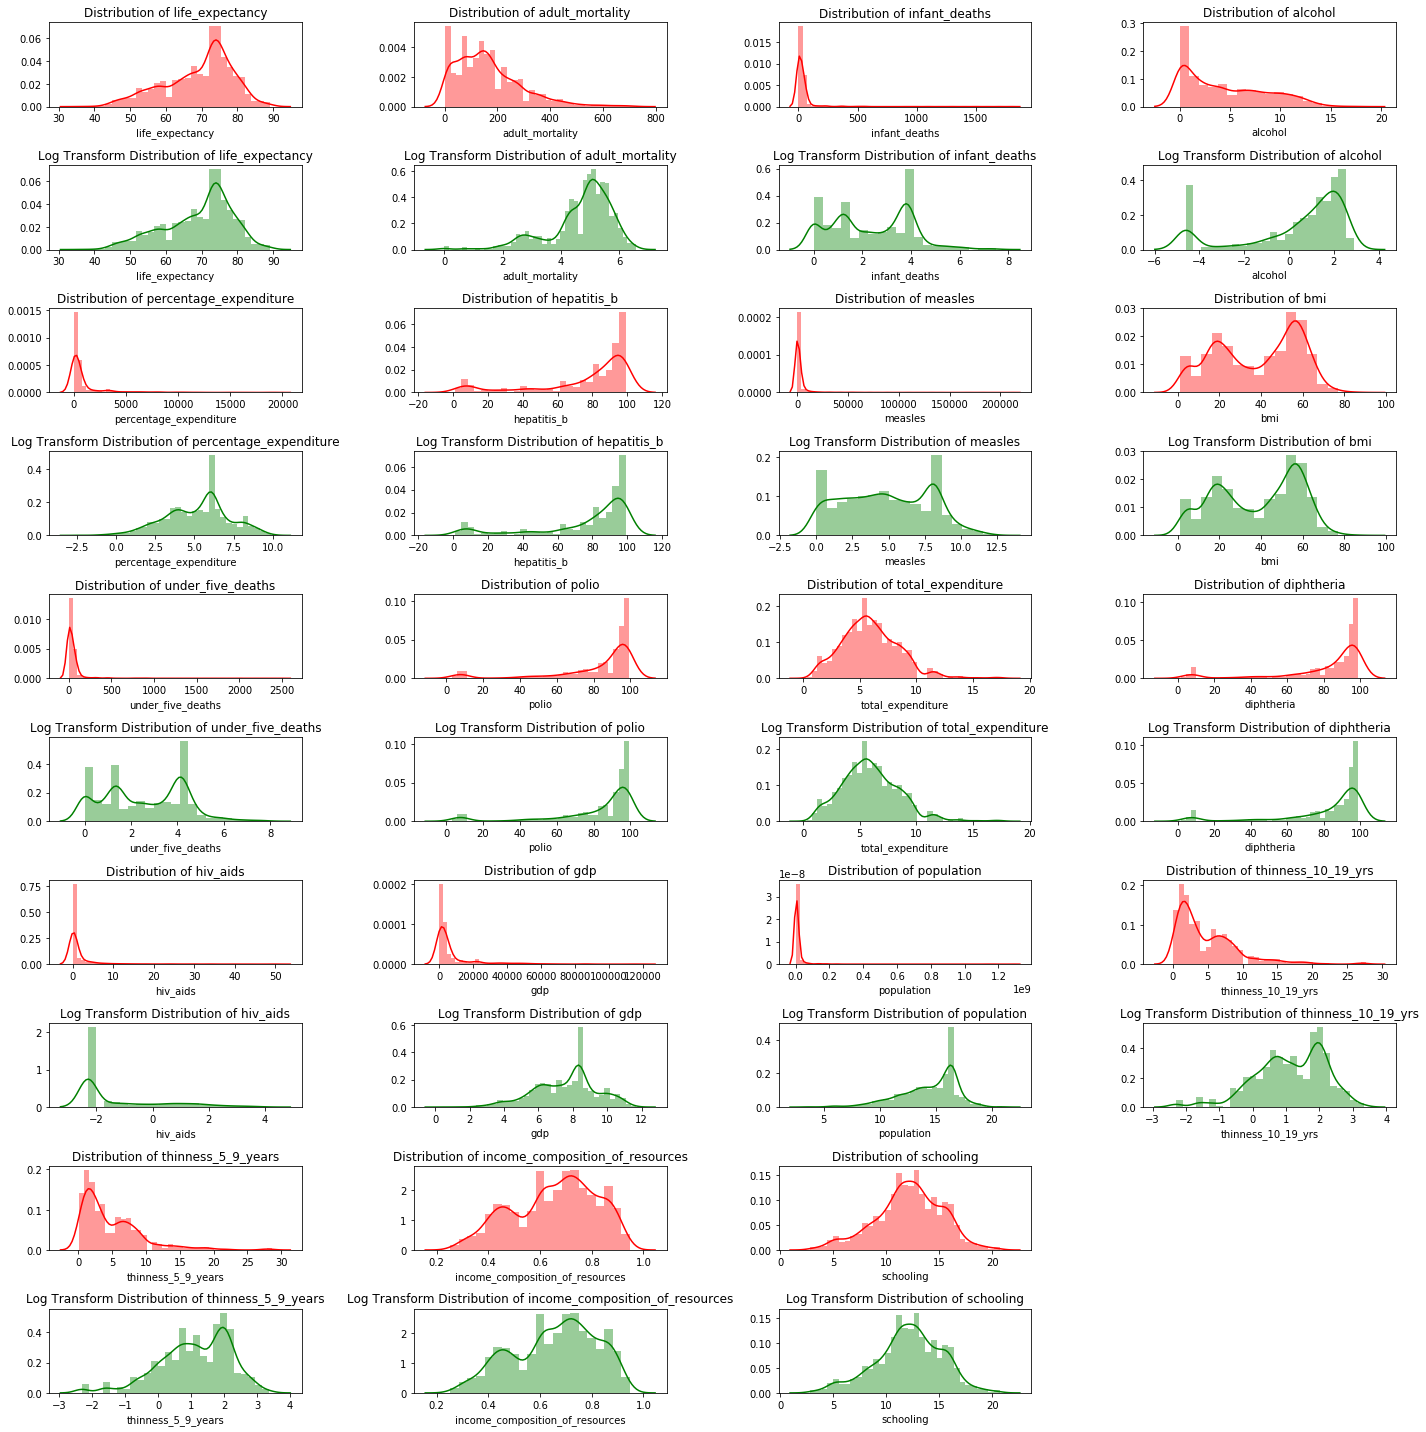

In [30]:
plt.figure(figsize=(20, 20))
i = 1
for col in column_names1:
    # original data 
    ind = 4*((i-1)//4)+i # for 1st row, 3rd row...
    plt.subplot(10, 4, ind)
    sns.distplot(life_df3[col], color='r')
    plt.title(F"Distribution of {col}")
    
    # transformed data 
    ind2 = 4*(((i-1)//4)+1)+i # for 2nd row, 4th row...
    plt.subplot(10, 4, ind2)
    sns.distplot(life_df4[col], color='g')
    plt.title(F"Log Transform Distribution of {col}")
    i+=1
    
plt.tight_layout()
plt.show()

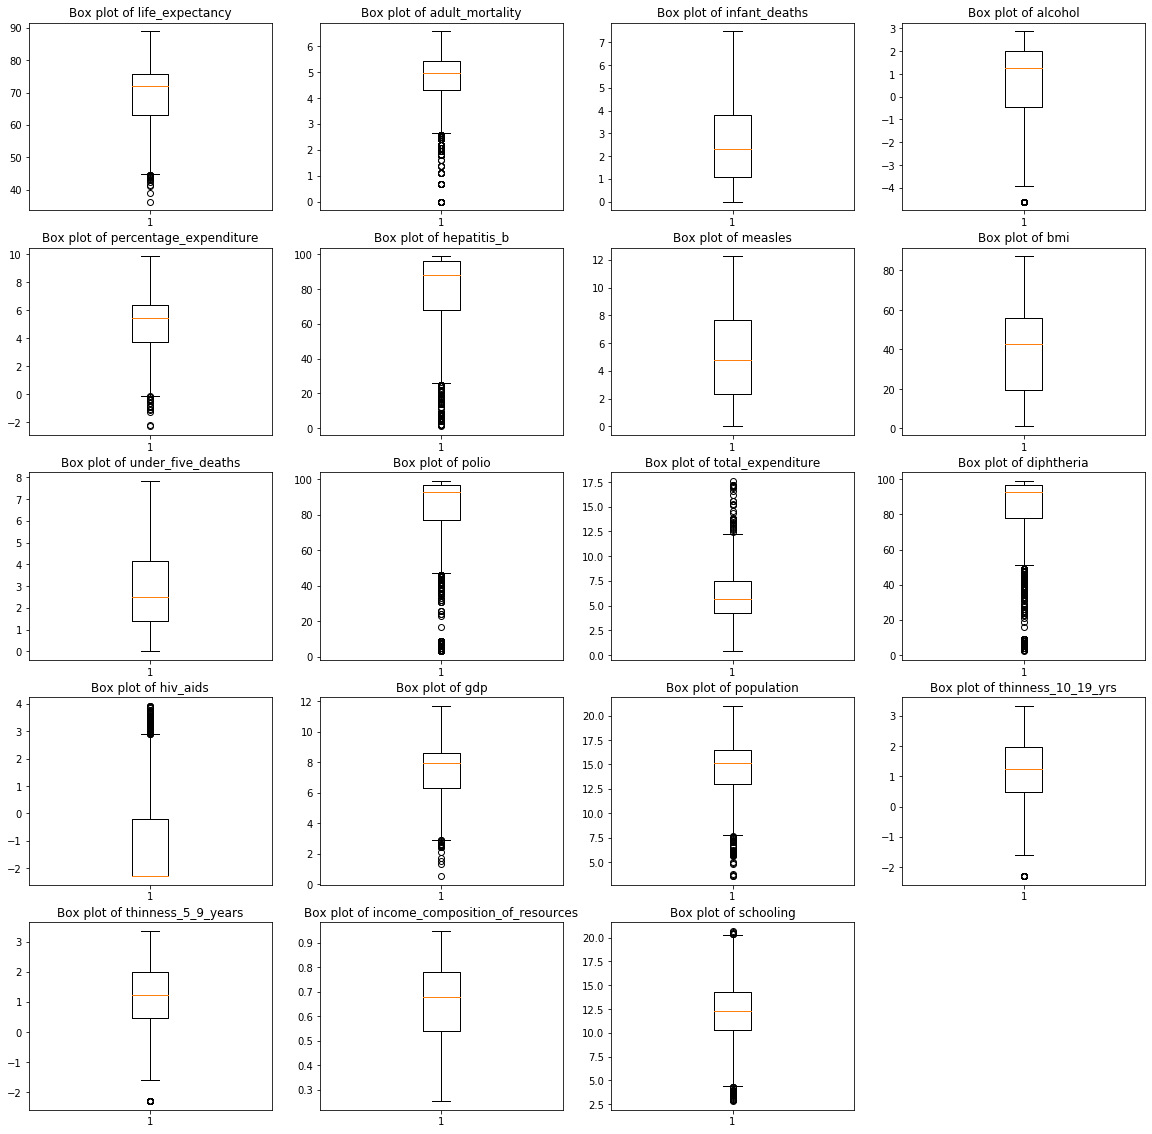

In [31]:
# Let's visualize the outliers afer transform

plt.figure(figsize=(20, 20))
i = 1
for col in column_names1:
    plt.subplot(5, 4, i)
    plt.boxplot(life_df4[col])
    plt.title(F"Box plot of {col}")
    i+=1
plt.show()

#### Do BoxCox Transform on the Cleaned Data Set, allowing the function to choose lambda

In [53]:
adj_life_df = life_df3.copy() # make a copy of the existing dataframe

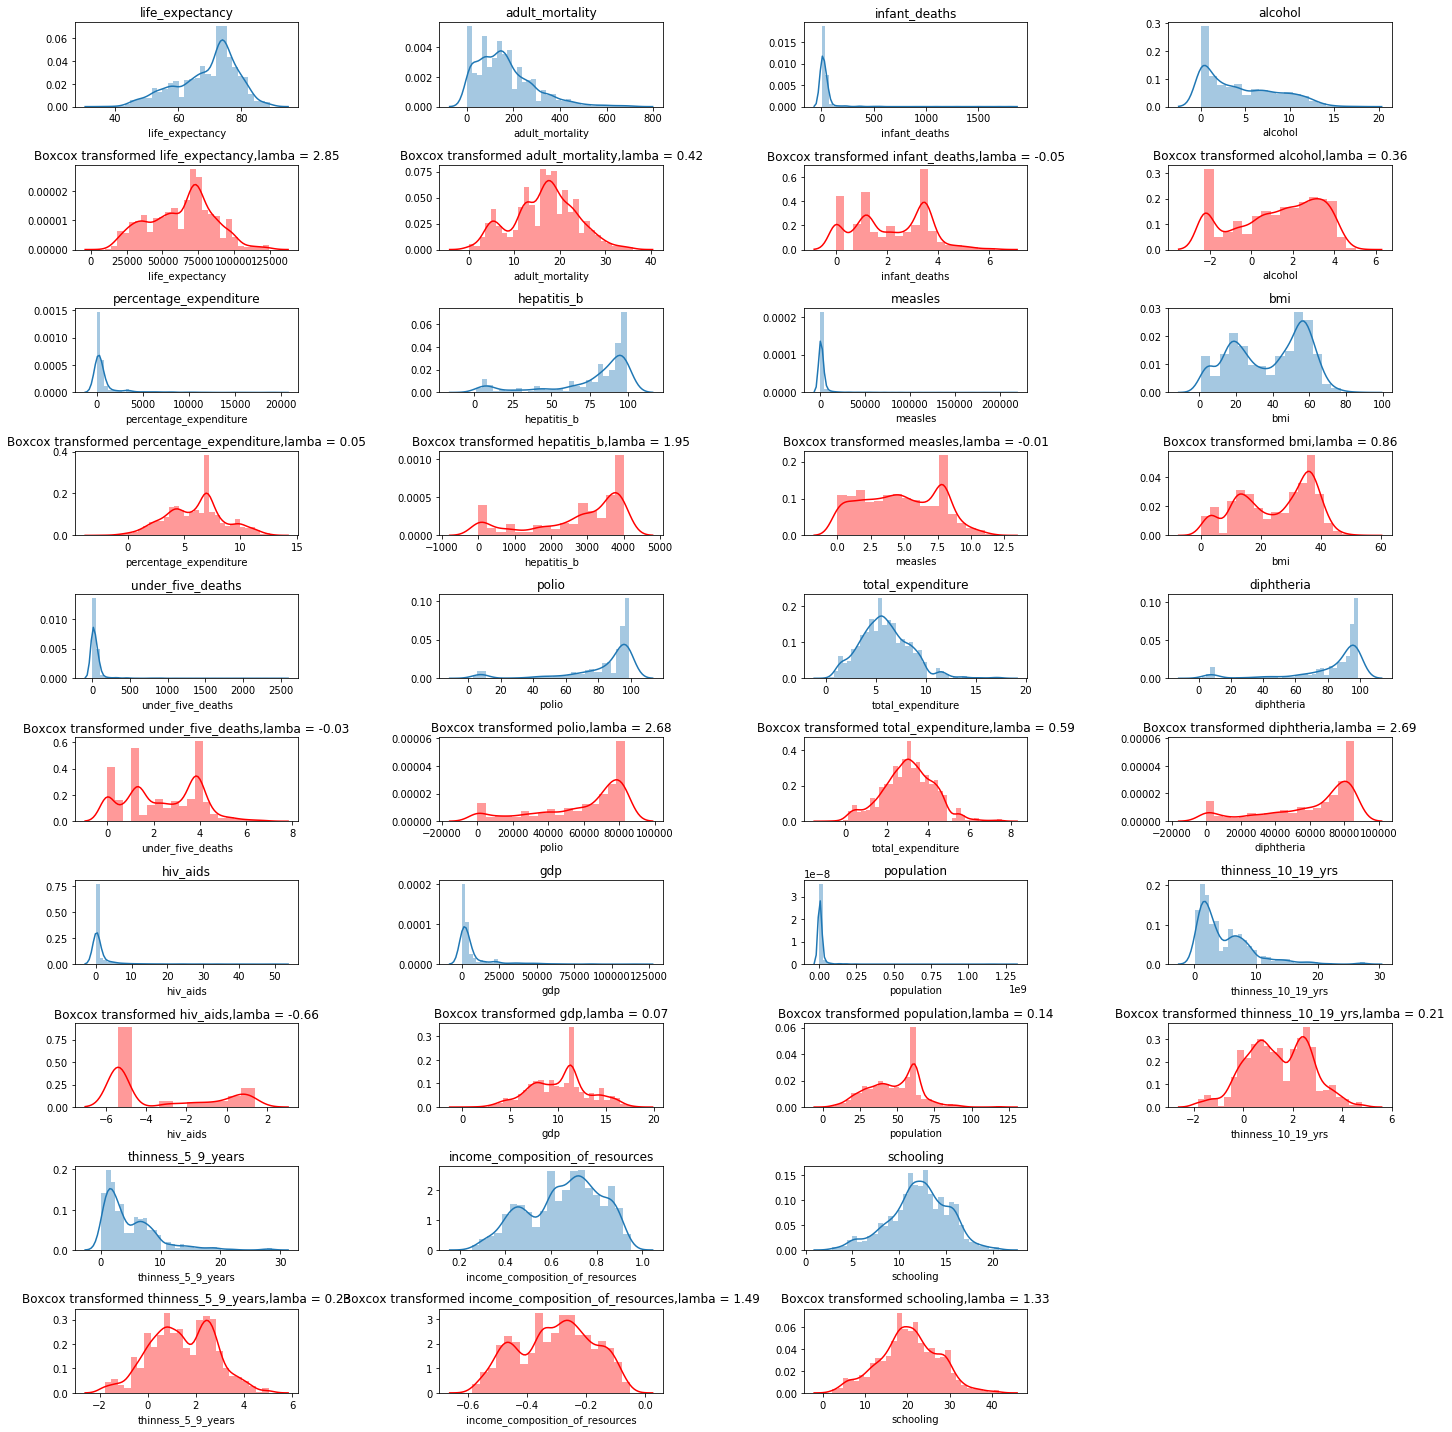

In [54]:
num_cols = column_names1 #list of columns with numerical value

# distribution visualization of data before and after boxcox transformation
plt.figure(figsize=(20, 20))
i = 1
for col in column_names1:
    
    # original data 
    ind = 4*((i-1)//4)+i # for 1st row, 3rd row...
    plt.subplot(10, 4, ind)
    sns.distplot(life_df3[col])
    plt.title(f'{col}', fontsize=12)
    
    # transformed data
    ind2 = 4*(((i-1)//4)+1)+i # for 2nd row, 4th row...
    adj_life_df[col],lam = boxcox(adj_life_df[col]) # transform data by taking log of data
    plt.subplot(10, 4, ind2)
    sns.distplot(adj_life_df[col], color='r')
    plt.title(f'Boxcox transformed {col},lamba = {round(lam, 2)}', fontsize=12)
    i+=1

plt.tight_layout()
plt.show()

In [ ]:
g = sns.pairplot(adj_life_df[:,3:], hue="status", palette="Set2", diag_kind="kde")

## Useful for reference: https://seaborn.pydata.org/tutorial/axis_grids.html

In [108]:
# Test distribution normality for these columns
for col in column_names1:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(col))
    print("------------------------------------------------")

    jb_stats = jarque_bera(life_df4[col])
    norm_stats = normaltest(life_df4[col])
    print("Jarque-Bera test statistics on original data is {0:.3} and p value is {1:.3}".format(*jb_stats))
    print("Normality test statistics on original data is {0:.3} and p value is {1:.3}".format(*norm_stats))
    
    sqrt_jb_stats = jarque_bera(adj_life_df[col])
    sqrt_norm_stats  = normaltest(adj_life_df[col])
    print("Jarque-Bera test statistics on log transformed data is {0:.3} and p value is {1:.3}".format(*boxcox_jb_stats))
    print("Normality test statistics on log transformed data is {0:.3} and p value is {1:.3}".format(*boxcox_norm_stats))

------------------------------------------------
Comparisons for variable: life_expectancy
------------------------------------------------
Jarque-Bera test statistics on original data is 2.8e+02 and p value is 0.0
Normality test statistics on original data is 3.47e+02 and p value is 4.05e-76
Jarque-Bera test statistics on log transformed data is 1.55e+02 and p value is 0.0
Normality test statistics on log transformed data is 4.59e+02 and p value is 2.31e-100
------------------------------------------------
Comparisons for variable: adult_mortality
------------------------------------------------
Jarque-Bera test statistics on original data is 1.72e+02 and p value is 0.0
Normality test statistics on original data is 5.46e+02 and p value is 2.24e-119
Jarque-Bera test statistics on log transformed data is 1.55e+02 and p value is 0.0
Normality test statistics on log transformed data is 4.59e+02 and p value is 2.31e-100
------------------------------------------------
Comparisons for varia

Distribution for most columns of data are not normal but we want to limit the amount of transformation we do.

In [113]:
# check correlation matrix after transformation
corr = adj_life_df.corr()
corr.style.background_gradient()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
year,1,0.148161,-0.0398744,-0.0503811,-0.144102,0.000775488,0.219595,-0.140982,0.0834316,-0.0531066,0.090219,0.0635444,0.131722,-0.0906931,0.127806,0.0352862,-0.033833,-0.0316573,0.212799,0.201088
life_expectancy,0.148161,1,-0.579786,-0.618982,0.361312,0.473601,0.286947,-0.341733,0.52543,-0.646295,0.401758,0.223973,0.418694,-0.813314,0.538883,0.000746577,-0.594144,-0.596614,0.776335,0.744225
adult_mortality,-0.0398744,-0.579786,1,0.358732,-0.188195,-0.315087,-0.129239,0.163123,-0.312221,0.370269,-0.213066,-0.140478,-0.214882,0.460928,-0.315941,0.0202095,0.356748,0.371217,-0.443169,-0.414665
infant_deaths,-0.0503811,-0.618982,0.358732,1,-0.355027,-0.39638,-0.203138,0.601657,-0.43542,0.995406,-0.306717,-0.176864,-0.285122,0.449164,-0.408621,0.293381,0.450828,0.469718,-0.504471,-0.561995
alcohol,-0.144102,0.361312,-0.188195,-0.355027,1,0.346969,0.0712598,-0.194945,0.285845,-0.353456,0.192726,0.299216,0.183299,-0.113521,0.381269,-0.0395987,-0.464993,-0.456449,0.411659,0.46624
percentage_expenditure,0.000775488,0.473601,-0.315087,-0.39638,0.346969,1,0.0781772,-0.185555,0.296293,-0.396258,0.183725,0.146416,0.18094,-0.271049,0.661389,-0.143598,-0.370858,-0.376468,0.505875,0.490368
hepatitis_b,0.219595,0.286947,-0.129239,-0.203138,0.0712598,0.0781772,1,-0.209535,0.177634,-0.21231,0.410953,0.114319,0.533408,-0.266742,0.125177,0.029934,-0.108724,-0.116213,0.252557,0.271094
measles,-0.140982,-0.341733,0.163123,0.601657,-0.194945,-0.185555,-0.209535,1,-0.302533,0.605579,-0.222781,-0.174211,-0.212051,0.217213,-0.197781,0.193643,0.301825,0.311842,-0.255044,-0.327962
bmi,0.0834316,0.52543,-0.312221,-0.43542,0.285845,0.296293,0.177634,-0.302533,1,-0.453438,0.228008,0.199107,0.222686,-0.428942,0.352658,-0.00487664,-0.502634,-0.513027,0.50049,0.494233
under_five_deaths,-0.0531066,-0.646295,0.370269,0.995406,-0.353456,-0.396258,-0.21231,0.605579,-0.453438,1,-0.319209,-0.181073,-0.299592,0.47789,-0.416696,0.280548,0.459493,0.476826,-0.524861,-0.581211


In [141]:
adj_life_df.corr()['life_expectancy'].sort_values(ascending=False)

life_expectancy                    1.000000
income_composition_of_resources    0.755482
schooling                          0.732578
percentage_expenditure             0.583794
gdp                                0.539295
bmi                                0.441358
diphtheria                         0.343085
polio                              0.323923
alcohol                            0.262108
hepatitis_b                        0.245673
total_expenditure                  0.194600
year                               0.148161
population                        -0.041291
measles                           -0.328630
adult_mortality                   -0.453752
infant_deaths                     -0.537460
thinness_1_19_years               -0.577374
thinness_5_9_years                -0.578965
under_five_deaths                 -0.585598
hiv_aids                          -0.825880
Name: life_expectancy, dtype: float64

Life expectancy somewhat highly correlates positively with:
    - BMI
    - GDP
    - income/composition of resources
    - schooling

    and negatively correlates with:
    - thinness between 1-19 or 5-9 years
    - presence of HIV/AIDS and measles 
    


# 5. Multivariate Analysis

82.10956101451418
1.0


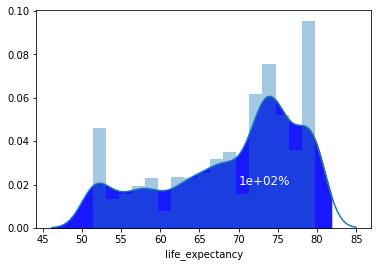

In [123]:
longivity_cutoff = adj_life_df['life_expectancy'].mean() + 1.5*adj_life_df['life_expectancy'].std()
p_cutoff = (adj_life_df['life_expectancy'] < longivity_cutoff).sum()/len(adj_life_df['life_expectancy'])
print(longivity_cutoff)
print(p_cutoff)
ax = sns.distplot(adj_life_df['life_expectancy'])
# fill area under distribution curve
line = ax.lines[0]
x1 = line.get_xydata()[:,0]
y1 = line.get_xydata()[:,1]
ax.fill_between(x1[x1<longivity_cutoff],y1[x1<longivity_cutoff], color="blue", alpha=0.9)
ax.text(s='{:.3}%'.format(p_cutoff*100), x=70, y=0.02, fontdict={'size':12, 'color':'white'})
plt.show()



Longivity cutoff is 83.4 years


ValueError: cannot convert float NaN to integer

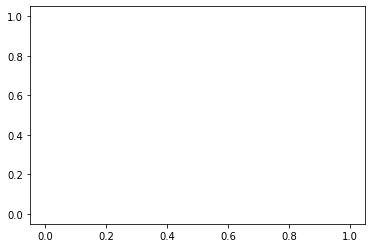

In [122]:
adj_life_df2 = adj_life_df.copy()

# preparing data
longivity_cutoff = adj_life_df2['life_expectancy'].mean() + 1.5life_df4['life_expectancy'].std()
p_cutoff = (life_df4['life_expectancy'] < longivity_cutoff).sum()/len(life_df4['life_expectancy'])
print('Longivity cutoff is {:.1f} years'.format(longivity_cutoff))

ax = sns.distplot(life_df2['life_expectancy'])
# fill area under distribution curve
line = ax.lines[0]
x1 = line.get_xydata()[:,0]
y1 = line.get_xydata()[:,1]
ax.fill_between(x1[x1<longivity_cutoff],y1[x1<longivity_cutoff], color="blue", alpha=0.9)
ax.text(s='{:.3}%'.format(p_cutoff*100), x=70, y=0.02, fontdict={'size':12, 'color':'white'})
plt.show()

# make target column categorial
pca_life_df2 = adj_life_df2.copy()
pca_life_df2['longevity'] = np.where(adj_life_df2['life_expectancy'] > longivity_cutoff, 'long_lived', 'not_long_lived')
pca_life_df2.drop('life_expectancy', axis=1, inplace=True)


# split dataset
data = pca_life_df2.loc[:, pca_life_df2.columns != 'longevity']
data_cols = data.columns
target = pca_life_df2.loc[:, pca_life_df2.columns == 'longevity']
target.reset_index(inplace=True, drop=True)

# feature scaling
data = StandardScaler().fit_transform(data)

# initialize and fit PCA
pca = PCA(n_components=2)
pca_data2 = pca.fit_transform(data)

# explained variance
explained_var = pca.explained_variance_ratio_
print('Principal component 1 explains {:.0f}% and component 2 explains {:.0f}%'.format(*explained_var*100))

# visualize 2D-PCA
plt.figure()
colors = ['navy', 'darkorange']
target_names = ['long_lived', 'not_long_lived']
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(pca_data2[np.where(target == target_name)[0], 0], pca_data2[np.where(target == target_name)[0], 1], color=color, 
                alpha=.5, lw=12, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Countries Life Span')
plt.show()